In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!sudo apt-get install graphviz libgraphviz-dev pkg-config
!pip install pygraphviz

import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt


Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 16 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubunt

## Creating the main graph

In [0]:
import csv

unigeLinks=nx.DiGraph()
links=[]

with open('/content/drive/My Drive/Data Visualization/nodesV1.csv', newline='') as csvfile:
  spamreader = csv.reader(csvfile)
  count=1
  for row in spamreader:
      
    links.append(row[0])
    unigeLinks.add_node(row[0])

In [0]:
with open('/content/drive/My Drive/Data Visualization/edgesV1.csv', newline='') as csvfile:
  spamreader = csv.reader(csvfile)
  count=1
  for row in spamreader:
    unigeLinks.add_edge(row[0],row[1])

In [0]:
nx.number_of_nodes(unigeLinks)

1272

In [0]:
nx.number_of_edges(unigeLinks)

1534

In [0]:
to_del = [n for n in unigeLinks if unigeLinks.degree(n) < 1]
unigeLinks.remove_nodes_from(to_del)

In [0]:
list(nx.nodes(unigeLinks))

## Displaying the graph

In [0]:
import matplotlib.pyplot as plt


pos = nx.spring_layout(unigeLinks, iterations=50)

In [0]:
def displayColoredGraph(G,pos,topics):
  cmap=[]
  tGrey=[]
  for node in G:
    if node in topics[0]:
      cmap.append('green')
    elif node in topics[1]:
    elif node in topics[2]:
      cmap.append('red')
    elif node in topics[3]:
      cmap.append('yellow')
    elif node in topics[4]:
      cmap.append('cyan')
    elif node in topics[5]:
      cmap.append('orange')
    else:
      tGrey.append(node)
      cmap.append('grey')
  nx.draw(G, pos,node_color=cmap, node_size=20)
  plt.show()
  return tGrey

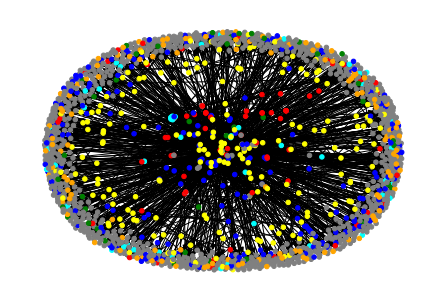

In [0]:
#nx.draw(unigeLinks, pos, node_color=range(1522), node_size=20, cmap=plt.cm.Blues)
#plt.show()

In [0]:
unigeLinks.remove_nodes_from(grey)

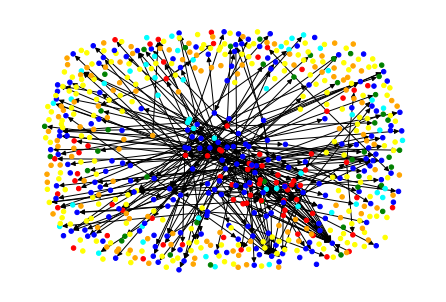

[]

In [0]:
pos = nx.spring_layout(unigeLinks, iterations=10)
displayColoredGraph(topics)

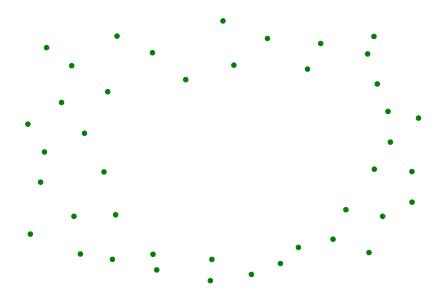

[]

In [0]:
t0_Graph=unigeLinks.subgraph(topics[0])
pos = nx.spring_layout(t0_Graph, iterations=10)
displayColoredGraph(t0_Graph,pos,topics)

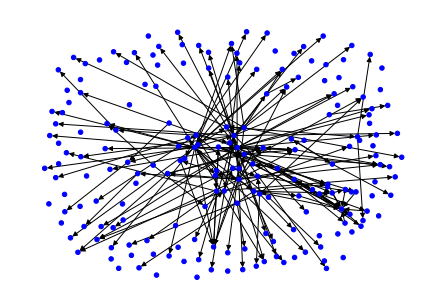

[]

In [0]:
t1_Graph=unigeLinks.subgraph(topics[1])
pos = nx.spring_layout(t1_Graph, iterations=10)
displayColoredGraph(t1_Graph,pos,topics)

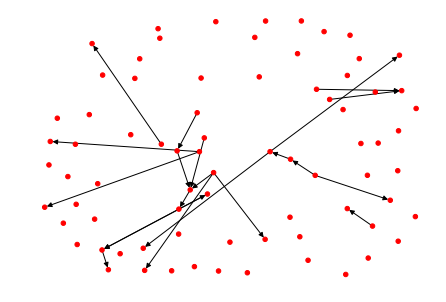

[]

In [0]:
t2_Graph=unigeLinks.subgraph(topics[2])
pos = nx.spring_layout(t2_Graph, iterations=10)
displayColoredGraph(t2_Graph,pos,topics)

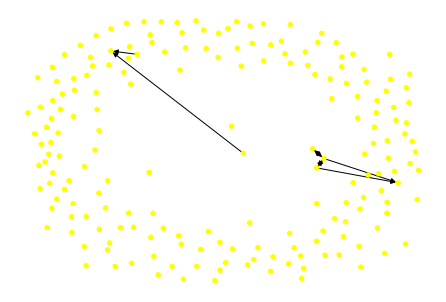

[]

In [0]:
t3_Graph=unigeLinks.subgraph(topics[3])
pos = nx.spring_layout(t3_Graph, iterations=10)
displayColoredGraph(t3_Graph,pos,topics)

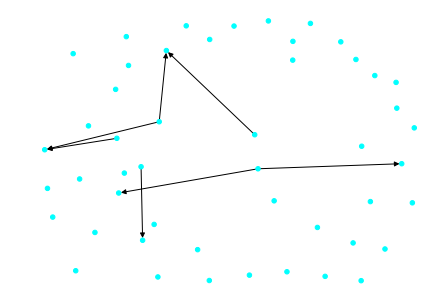

[]

In [0]:
t4_Graph=unigeLinks.subgraph(topics[4])
pos = nx.spring_layout(t4_Graph, iterations=10)
displayColoredGraph(t4_Graph,pos,topics)

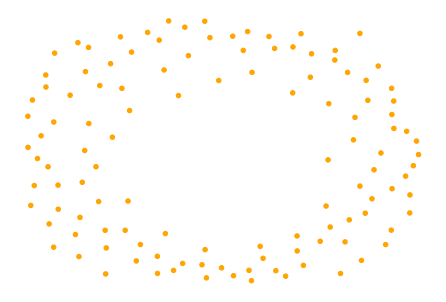

[]

In [0]:
t5_Graph=unigeLinks.subgraph(topics[5])
pos = nx.spring_layout(t5_Graph, iterations=10)
displayColoredGraph(t5_Graph,pos,topics)

##Analysis

In [0]:

#Components
print("Connected components: ",nx.number_weakly_connected_components(unigeLinks))

Connected components:  352


In [0]:

i=0
for g in nx.weakly_connected_components(unigeLinks):
  i+=1
  print("Avg shortest path for component "+str(i)+ " with " + str(len(list((g)))))

## Creating the second graph with new dataset

In [0]:
import csv

new_unigeLinks=nx.Graph()
classified_nodes=[]

with open('/content/drive/My Drive/Data Visualization/nodes_content.csv', newline='') as csvfile:
  spamreader = csv.reader(csvfile)
  count=1
  for row in spamreader:
    if count==1:
      count+=1
      continue    
    if row[2]!="https://www.studenti.unige.it":
      row[2]=row[2][29:]
    classified_nodes.append(row[2])
    new_unigeLinks.add_node(row[2])

In [0]:
with open('/content/drive/My Drive/Data Visualization/edges_content_df.csv', newline='') as csvfile:
  spamreader = csv.reader(csvfile)
  count=1
  t0=[]
  t1=[]
  t2=[]
  t3=[]
  t4=[]
  t5=[]
  t6=[]
  t7=[]
  t8=[]
  for row in spamreader:
    if count==1:
      count+=1
      continue   
    if row[0]!="https://www.studenti.unige.it":
      row[0]=row[0][29:]
    row[1]=int(row[1])
    if row[1]==0:
      t0.append(row[0])
    elif row[1]==1:
      t1.append(row[0])
    elif row[1]==2:
      t2.append(row[0])
    elif row[1]==3:
      t3.append(row[0])
    elif row[1]==4:
      t4.append(row[0])
    elif row[1]==5:
      t5.append(row[0])
    elif row[1]==6:
      t6.append(row[0])
    elif row[1]==7:
      t7.append(row[0])
    elif row[1]==8:
      t8.append(row[0])
       
  print("en t0 hay: ",len(t0))
  print("en t1 hay: ",len(t1))
  print("en t2 hay: ",len(t2))
  print("en t3 hay: ",len(t3))
  print("en t4 hay: ",len(t4))
  print("en t5 hay: ",len(t5))
  print("en t6 hay: ",len(t6))
  print("en t7 hay: ",len(t7))
  print("en t8 hay: ",len(t8))
  topics=[t0,t1,t2,t3,t4,t5,t6,t7,t8]
      
       

en t0 hay:  127
en t1 hay:  120
en t2 hay:  84
en t3 hay:  152
en t4 hay:  97
en t5 hay:  125
en t6 hay:  373
en t7 hay:  84
en t8 hay:  279


In [0]:
list_ex=[]
col=['green','blue','red','yellow','cyan','orange','purple','tan','grey']
for i in range(len(topics)):
  for j in range(len(topics[i])):
    list_ex.append(topics[i][j])
    for k in range(j+1,len(topics[i])):
      new_unigeLinks.add_edge(topics[i][j],topics[i][k],color=col[i])
list_ex=list(set(list_ex))

NameError: ignored

In [0]:
import matplotlib.pyplot as plt
import math

G=unigeLinks
#Gmax= max(nx.connected_component_subgraphs(G), key=len)
pos = nx.spring_layout(G, iterations=200,k=10/math.sqrt(G.order()))

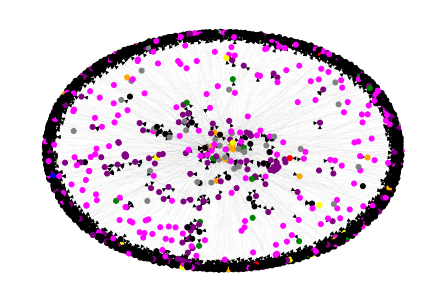

In [0]:

cmap=[]
for node in G:
  count=0
  if node in topics[0]:
    col='green'
    count+=1
  if node in topics[1]:
    col='blue'
    count+=1
  if node in topics[2]:
    col='red'
    count+=1
  if node in topics[3]:
    col='yellow'
    count+=1
  if node in topics[4]:
    col='cyan'
    count+=1
  if node in topics[5]:
    col='orange'
    count+=1
  if node in topics[6]:
    col='purple'
    count+=1
  if node in topics[7]:
    col='tan'
    count+=1
  if node in topics[8]:
    col='grey'
    count+=1
  if count>1:
    col='magenta'
  if count==0:
    col='black'
  cmap.append(col)


edges=G.edges()
#colors = [G[u][v]['color'] for u,v in edges]
#nx.draw(G, pos, width=0.01, edges=edges, edge_color=colors, node_color=cmap, node_size=25)
nx.draw(G, pos, width=0.01, node_color=cmap, node_size=25)
plt.show()

In [0]:
for i in range(len(classified_nodes)):
  if classified_nodes[i] not in list_ex:
    print("number" + str(i)+" : "+classified_nodes[i])
      

##Deleting unnecesary rows and columns

In [0]:
import csv
lista=list(nx.nodes(unigeLinks))
with open('/content/drive/My Drive/Data Visualization/nodes.csv', 'r') as inp, open('/content/drive/My Drive/Data Visualization/nodesV1.csv', 'w') as out:
    writer = csv.writer(out)
    for row in csv.reader(inp):
        if row[0] in lista:
            writer.writerow(row)

In [0]:
conx= list(nx.edges(unigeLinks))

In [0]:
conx[0][0]

'https://www.studenti.unige.it'

In [0]:
import csv
conx= list(nx.edges(unigeLinks))
with open('/content/drive/My Drive/Data Visualization/edgesV1.csv', 'w') as out:
    writer = csv.writer(out)
    for row in conx:
      writer.writerow(row)

In [0]:
import csv
with open('/content/drive/My Drive/Data Visualization/nodesV1.csv', 'r') as inp, open('/content/drive/My Drive/Data Visualization/nodesV2.csv', 'w') as out:
    writer = csv.writer(out)
    row1=['id','label','size','topics']
    writer.writerow(row1)
    for row in csv.reader(inp):
      row.append("")
      if row[0] in topics[0]:
        row[3]+='0'
      if row[0] in topics[1]:
        row[3]+='1'
      if row[0] in topics[2]:
        row[3]+='2'
      if row[0] in topics[3]:
        row[3]+='3'
      if row[0] in topics[4]:
        row[3]+='4'
      if row[0] in topics[5]:
        row[3]+='5'
      if row[0] in topics[6]:
        row[3]+='6'
      if row[0] in topics[7]:
        row[3]+='7'
      if row[0] in topics[8]:
        row[3]+='8'
      writer.writerow(row)

In [0]:
import csv
with open('/content/drive/My Drive/Data Visualization/edgesV1.csv', 'r') as inp, open('/content/drive/My Drive/Data Visualization/edgesV2.csv', 'w') as out:
    writer = csv.writer(out)
    row1=['source','target','topicEdge']
    writer.writerow(row1)
    for row in csv.reader(inp):
      row.append("")
      if row[0] in topics[0] and row[1] in topics[0]:
        row[2]+='0'
      if row[0] in topics[1] and row[1] in topics[1]:
        row[2]+='1'
      if row[0] in topics[2] and row[1] in topics[2]:
        row[2]+='2'
      if row[0] in topics[3] and row[1] in topics[3]:
        row[2]+='3'
      if row[0] in topics[4] and row[1] in topics[4]:
        row[2]+='4'
      if row[0] in topics[5] and row[1] in topics[5]:
        row[2]+='5'
      if row[0] in topics[6] and row[1] in topics[6]:
        row[2]+='6'
      if row[0] in topics[7] and row[1] in topics[7]:
        row[2]+='7'
      if row[0] in topics[8] and row[1] in topics[8]:
        row[2]+='8'
      writer.writerow(row)